In [5]:
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import matplotlib.pyplot as plt
import random

In [19]:
def load_pa(filename):
    result = []
    with open(filename) as f:
        for line in f:
            if line[:5] == '-----':
                break
        for line in f:
            result.append(int(line))
    return result

def save_pa(filename, data):
    with open(filename, 'w') as f:
        f.write(f'{len(data)}\n')
        f.write('-------------------------------------\n')
        for item in data:
            f.write(f'{item}\n')

def fuzzify_partitions(data, partitions, k=5, alpha=0.5):
    neighbors = NearestNeighbors(n_neighbors=k + 1).fit(data)
    _, neighbor_indices = neighbors.kneighbors(data)
    
    fuzzy_partitions = np.zeros([len(partitions), len(set(partitions))])
    increment = (1 - alpha) / k
    for i, neighborhood in enumerate(neighbor_indices):
        fuzzy_partitions[i][partitions[i] - 1] = alpha
        for neighbor in neighborhood[1:]:
            fuzzy_partitions[i][partitions[neighbor] - 1] += increment
        
    return fuzzy_partitions

In [3]:
worms = np.loadtxt('data/worms/worms_64d.txt')
worm_partitions = load_pa('data/worms/worms_64d-gt.pa')

In [130]:
worms.shape

(105000, 64)

In [132]:
len(set(worm_partitions))

25

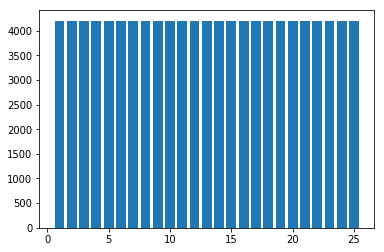

In [5]:
cluster_sizes = Counter(worm_partitions)
fig, axes = plt.subplots()
axes.bar(cluster_sizes.keys(), cluster_sizes.values());

In [4]:
#fuzzy_partitions = fuzzify_partitions(worms, worm_partitions)
#np.save('data/worms/worms_64d-fuzzy_gt.npy', fuzzy_partitions)
fuzzy_partitions = np.load('data/worms/worms_64d-fuzzy_gt.npy')

In [46]:
max_weights = Counter(fuzzy_partitions.max(axis=1))

In [49]:
max_weights

Counter({0.9999999999999999: 83076,
         0.8999999999999999: 2729,
         0.5: 9600,
         0.6: 4317,
         0.7999999999999999: 2498,
         0.7: 2780})

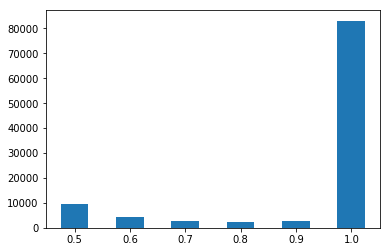

In [51]:
fig, axes = plt.subplots()
axes.bar(max_weights.keys(), max_weights.values(), width=0.05);

In [116]:
split_degree = Counter([v for v in np.sum(np.ceil(fuzzy_partitions), axis=1) if v > 1])

In [117]:
split_degree

Counter({2.0: 5466, 4.0: 5741, 3.0: 6034, 5.0: 3598, 6.0: 1085})

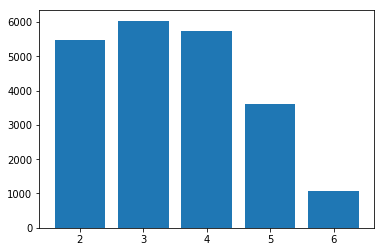

In [118]:
fig, axes = plt.subplots()
axes.bar(split_degree.keys(), split_degree.values());

In [7]:
sample = random.sample(range(len(worms)), k=2048)

In [21]:
sampled_worms = worms[sample]
sampled_worm_partitions = np.array(worm_partitions)[sample]
sampled_fuzzy_partitions = fuzzify_partitions(sampled_worms, sampled_worm_partitions)
np.savetxt('data/worms/worms_64d_sample.txt', sampled_worms)
np.save('data/worms/worms_64d_sample-fuzzy_gt.npy', sampled_fuzzy_partitions)
save_pa('data/worms/worms_64d_sample-gt.pa', sampled_worm_partitions)

In [22]:
len(set(sampled_worm_partitions))

25

<IPython.core.display.Javascript object>


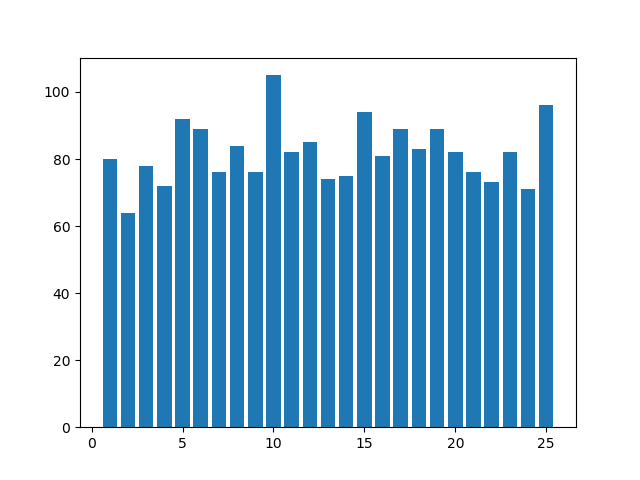

In [12]:
cluster_sizes = Counter(sampled_worm_partitions)
fig, axes = plt.subplots()
axes.bar(cluster_sizes.keys(), cluster_sizes.values());

In [14]:
max_weights = Counter(sampled_fuzzy_partitions.max(axis=1))
max_weights

Counter({0.9999999999999999: 1603,
         0.8999999999999999: 63,
         0.6: 94,
         0.7: 56,
         0.7999999999999999: 63,
         0.5: 169})

<IPython.core.display.Javascript object>


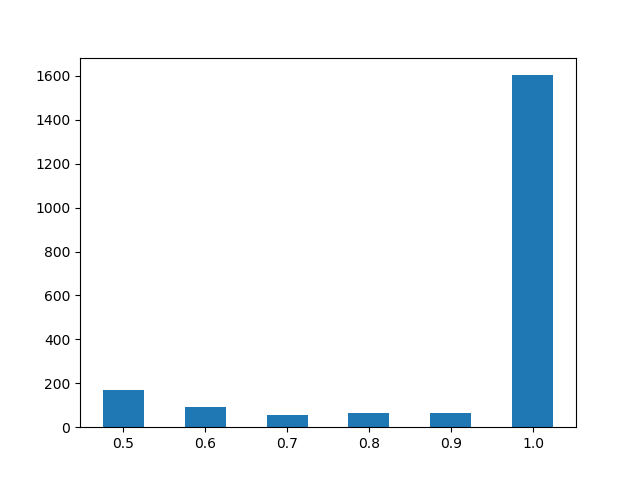

In [15]:
fig, axes = plt.subplots()
axes.bar(max_weights.keys(), max_weights.values(), width=0.05);

In [17]:
split_degree = Counter([v for v in np.sum(np.ceil(sampled_fuzzy_partitions), axis=1) if v > 1])
split_degree

Counter({2.0: 120, 3.0: 119, 4.0: 116, 5.0: 68, 6.0: 22})

<IPython.core.display.Javascript object>


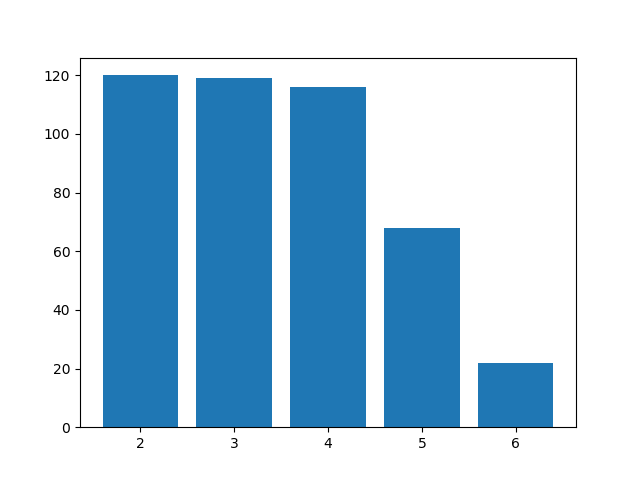

In [18]:
fig, axes = plt.subplots()
axes.bar(split_degree.keys(), split_degree.values());

In [5]:
dimset_128 = np.loadtxt('data/dim_set/dim128.txt')
dimset_128_partitions = load_pa('data/dim_set/dim128.pa.txt')

In [6]:
dimset_128.shape

(1024, 128)

In [7]:
len(set(dimset_128_partitions))

16

In [12]:
#fd128 = fuzzify_partitions(dimset_128, dimset_128_partitions)
#np.save('data/dim_set/dim128-fuzzy_gt.npy', fd128)
fd128 = np.load('data/dim_set/dim128-fuzzy_gt.npy')

In [10]:
min(fd128.max(axis=0))

0.9999999999999999

<IPython.core.display.Javascript object>


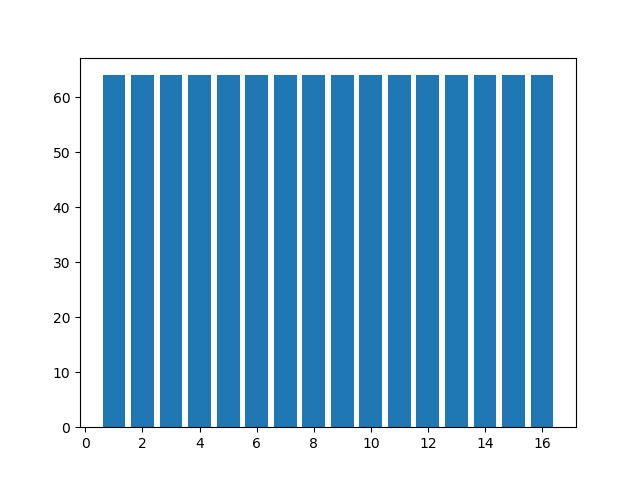

In [11]:
cluster_sizes = Counter(dimset_128_partitions)
fig, axes = plt.subplots()
axes.bar(cluster_sizes.keys(), cluster_sizes.values());

In [ ]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#